### KERAS
Keras is a high level API written with Python and capable of running on top of Tensorflow, Theano, or CNTK. 

### model.compile(self, optimizer, loss, metrics)

#### Optimizer : 
An algorithm, that given a set of parameters, returns one with a smaller cost function. 

SGD : Stochastic Gradient Descent optimizer. It includes support for momentum, learning rate decay and Nesterov momentum.

RMSprop : Applied mainly for RNN.

Adam : An algorithm for first order gradient based optimization of stochastic objective functions.

#### Loss :
The objective function for measuring the accuracy of performance error of a neural network.

mean_squared_error : Used for Regression problems.

binary_crossentropy : Used for two class targets.

categorical_crossentropy : used for multi class targets.

#### Metrics :
The list of metrics

'accuracy' : for classifications.

In [24]:
# Importing required packages

from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Understanding the image data fromat

In [28]:
X_train[0].shape

(28, 28)

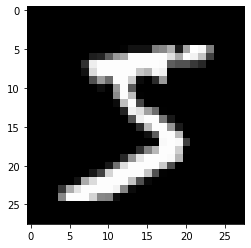

In [29]:
plt.imshow(X_train[0], cmap = 'gray')

In [30]:
y_train[0]

5

### Preprocessing the image data

In [31]:
image_height, image_width = 28,28

In [32]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

In [33]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [34]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [35]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [36]:
X_train /= 255.0
X_test /= 255.0

In [37]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [38]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [39]:
y_train = to_categorical(y_train,10)
print(y_train.shape)

(60000, 10)


In [40]:
y_test = to_categorical(y_test,10)
print(y_test.shape)

(10000, 10)


### Building a Keras model

In [41]:
model = Sequential()

In [42]:
model.add(Dense(512, activation = 'relu', input_shape = (784,)))

In [43]:
model.add(Dense(512, activation = 'relu'))

In [44]:
model.add(Dense(10, activation = 'softmax'))

### Model Compilation

In [45]:
model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [47]:
784*512 +512

401920

In [48]:
512*512 + 512

262656

In [49]:
512*10 + 10

5130

### Model Training

In [50]:
history = model.fit(X_train, y_train, epochs = 10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10


InternalError: 2 root error(s) found.
  (0) Internal: Blas GEMM launch failed : a.shape=(32, 784), b.shape=(784, 512), m=32, n=512, k=784
	 [[{{node dense_4/MatMul}}]]
	 [[loss/mul/_83]]
  (1) Internal: Blas GEMM launch failed : a.shape=(32, 784), b.shape=(784, 512), m=32, n=512, k=784
	 [[{{node dense_4/MatMul}}]]
0 successful operations.
0 derived errors ignored.

### Model Accuracy

#### Accuracy of the Training Model

In [ ]:
plt.plot(history.history['acc'])

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['acc'])

In [ ]:
score = model.evaluate(X_test, y_test)